# `streamline_horses_featurization_horse.ipynb`

### Author: Anthony Hein

#### Last updated: 11/3/2021

# Overview:

Perform feature engineering on the horses dataset to summarize the past performance of any given horse.

---

## Setup

In [1]:
from datetime import datetime
import git
import os
import re
from typing import List
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
BASE_DIR = git.Repo(os.getcwd(), search_parent_directories=True).working_dir
BASE_DIR

'/Users/anthonyhein/Desktop/SML310/project'

---

## Load `horses_selected_trimmed_clean_augmented.csv`

In [3]:
horses_clean = pd.read_csv(f"{BASE_DIR}/data/streamline/horses_selected_trimmed_clean_augmented.csv", low_memory=False) 
horses_clean.head()

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,OR,father,mother,gfather,weight,res_win,res_place,res_show,finishing time,finishing time ratio
0,302858,Kings Return,6.0,4.0,0.600000,1,W P Mullins,D J Casey,1,0,...,NaN,King's Ride,Browne's Return,Deep Run,73,1,1,0,277.200000,1.000000
1,302858,Majestic Red I,6.0,5.0,0.047619,0,John Hackett,Conor O'Dwyer,2,8,...,NaN,Long Pond,Courtlough Lady,Giolla Mear,73,0,1,0,278.679948,1.005339
2,302858,Clearly Canadian,6.0,2.0,0.166667,0,D T Hughes,G Cotter,3,1.5,...,NaN,Nordico,Over The Seas,North Summit,71,0,0,0,278.957438,1.006340
3,302858,Bernestic Wonder,8.0,1.0,0.058824,0,E McNamara,J Old Jones,4,dist,...,NaN,Roselier,Miss Reindeer,Reindeer,73,0,0,0,284.507242,1.026361
4,302858,Beauty's Pride,5.0,6.0,0.038462,0,J J Lennon,T Martin,5,dist,...,NaN,Noalto,Elena's Beauty,Tarqogan,66,0,0,0,290.057045,1.046382


In [4]:
horses_clean.shape

(202304, 24)

In [5]:
horses_featurized_horse = horses_clean.copy()
horses_featurized_horse.head()

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,OR,father,mother,gfather,weight,res_win,res_place,res_show,finishing time,finishing time ratio
0,302858,Kings Return,6.0,4.0,0.600000,1,W P Mullins,D J Casey,1,0,...,NaN,King's Ride,Browne's Return,Deep Run,73,1,1,0,277.200000,1.000000
1,302858,Majestic Red I,6.0,5.0,0.047619,0,John Hackett,Conor O'Dwyer,2,8,...,NaN,Long Pond,Courtlough Lady,Giolla Mear,73,0,1,0,278.679948,1.005339
2,302858,Clearly Canadian,6.0,2.0,0.166667,0,D T Hughes,G Cotter,3,1.5,...,NaN,Nordico,Over The Seas,North Summit,71,0,0,0,278.957438,1.006340
3,302858,Bernestic Wonder,8.0,1.0,0.058824,0,E McNamara,J Old Jones,4,dist,...,NaN,Roselier,Miss Reindeer,Reindeer,73,0,0,0,284.507242,1.026361
4,302858,Beauty's Pride,5.0,6.0,0.038462,0,J J Lennon,T Martin,5,dist,...,NaN,Noalto,Elena's Beauty,Tarqogan,66,0,0,0,290.057045,1.046382


---

## Load `races_featurized.csv`

In [6]:
races_featurized = pd.read_csv(f"{BASE_DIR}/data/streamline/races_featurized.csv", low_memory=False) 
races_featurized.head()

,rid,course,title,winningTime,metric,ncond,class,runners,margin,1st_place_rank_in_odds,...,pressure_level_2,pressure_level_3,pressure_level_4,is_raining,rhum_level_0,rhum_level_1,rhum_level_2,rhum_level_3,rhum_level_4,entropy of odds
0,302858,Thurles,Liffey Maiden Hurdle (Div 1),277.2,3821.0,1,0,6,1.219263,1,...,0,1,0,0,0,0,0,0,1,1.350363
1,291347,Punchestown,Ericsson G.S.M. Grand National Trial Handicap ...,447.2,5229.0,5,0,9,1.218049,4,...,1,0,0,1,0,0,0,0,1,1.995151
2,75447,Listowel,Ballybunion E.B.F. Beginners S'chase,318.4,3620.0,5,0,8,1.277320,3,...,1,0,0,0,0,0,0,1,0,1.786421
3,358038,Punchestown,Quinns Of Baltinglass Chase (La Touche) (Cross...,533.9,6637.0,1,0,10,1.286595,1,...,0,1,0,0,0,0,0,1,0,1.611062
4,89211,Tipperary,Topaz Sprint Stakes (Listed),59.9,1005.0,4,0,5,1.217043,4,...,1,0,0,0,0,0,1,0,0,1.254374


In [7]:
races_featurized.shape

(20201, 129)

In [8]:
races_featurized['datetime'] = pd.to_datetime(races_featurized['datetime'])
races_featurized.head()

,rid,course,title,winningTime,metric,ncond,class,runners,margin,1st_place_rank_in_odds,...,pressure_level_2,pressure_level_3,pressure_level_4,is_raining,rhum_level_0,rhum_level_1,rhum_level_2,rhum_level_3,rhum_level_4,entropy of odds
0,302858,Thurles,Liffey Maiden Hurdle (Div 1),277.2,3821.0,1,0,6,1.219263,1,...,0,1,0,0,0,0,0,0,1,1.350363
1,291347,Punchestown,Ericsson G.S.M. Grand National Trial Handicap ...,447.2,5229.0,5,0,9,1.218049,4,...,1,0,0,1,0,0,0,0,1,1.995151
2,75447,Listowel,Ballybunion E.B.F. Beginners S'chase,318.4,3620.0,5,0,8,1.277320,3,...,1,0,0,0,0,0,0,1,0,1.786421
3,358038,Punchestown,Quinns Of Baltinglass Chase (La Touche) (Cross...,533.9,6637.0,1,0,10,1.286595,1,...,0,1,0,0,0,0,0,1,0,1.611062
4,89211,Tipperary,Topaz Sprint Stakes (Listed),59.9,1005.0,4,0,5,1.217043,4,...,1,0,0,0,0,0,1,0,0,1.254374


In [9]:
races_featurized = races_featurized.sort_values(by='datetime')
races_featurized[['datetime']].head(10)

,datetime
320,1990-01-20 14:30:00
321,1990-05-18 17:30:00
322,1990-05-18 18:30:00
323,1990-05-25 17:00:00
324,1990-05-28 18:30:00
325,1990-07-11 17:00:00
326,1990-07-20 18:00:00
328,1990-08-14 17:15:00
327,1990-08-14 18:45:00
329,1990-08-16 17:15:00


---

## Exploring Horses

In [15]:
len(np.unique(horses_featurized_horse['horseName']))

50291

In [10]:
horses_featurized_horse['horseName'].value_counts()

Sharjah           115
Geological         96
Oor Jock           91
Shabra Emperor     88
Bubbly Bellini     88
                 ... 
Olliver             1
Dolmen Village      1
Dan Bogan           1
Game Or Salmon      1
Fountain Pen        1
Name: horseName, Length: 50291, dtype: int64

In [17]:
np.mean([v for k,v in horses_featurized_horse['horseName'].value_counts().to_dict().items()])

4.022668071821996

In [19]:
np.median([v for k,v in horses_featurized_horse['horseName'].value_counts().to_dict().items()])

2.0

In [18]:
np.mean([int(v == 1) for k,v in horses_featurized_horse['horseName'].value_counts().to_dict().items()])

0.3434411723767672

In [11]:
horses_featurized_horse['horseName'].value_counts()[:10000]

Sharjah              115
Geological            96
Oor Jock              91
Shabra Emperor        88
Bubbly Bellini        88
                    ... 
Chief Little Hawk      6
Revolutme              6
Belarusian             6
Pipes Of Peace         6
Mooneista              6
Name: horseName, Length: 10000, dtype: int64

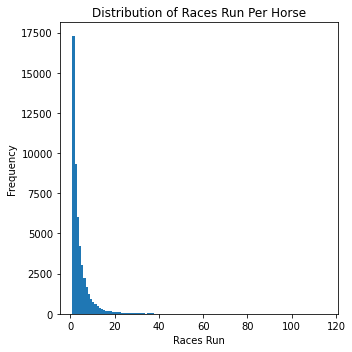

In [22]:
fig = plt.figure(figsize=(5,5))
gs = fig.add_gridspec(1, 1)

ax1 = fig.add_subplot(gs[0:1, 0:1])

ax1.set_title("Distribution of Races Run Per Horse")
ax1.hist(horses_featurized_horse['horseName'].value_counts(), bins=115)
ax1.set_xlabel("Races Run")
ax1.set_ylabel("Frequency")

plt.tight_layout()

fig.savefig(f"{BASE_DIR}/figures/horses_distribution.png")

plt.show()

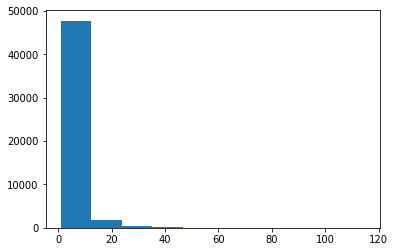

In [12]:
plt.hist(horses_featurized_horse['horseName'].value_counts())
plt.show()

In [14]:
list(horses_featurized_horse.columns)

['rid',
 'horseName',
 'age',
 'saddle',
 'decimalPrice',
 'isFav',
 'trainerName',
 'jockeyName',
 'position',
 'positionL',
 'dist',
 'outHandicap',
 'RPR',
 'TR',
 'OR',
 'father',
 'mother',
 'gfather',
 'weight',
 'res_win',
 'res_place',
 'res_show',
 'finishing time',
 'finishing time ratio']

## Map Horse to All Races

For any given race, we may only featurize it using races that have come before chronologically, else we are giving our model information that it doesn't have available to it.

In [46]:
def get_all_races_with_horse(horse_name: str) -> pd.core.frame.DataFrame:
    """
    Get all entries in the horses dataset with a horse of `horse_name`, and return
    these in sorted order by time that they occured.
    """
    
    df = horses_featurized_horse[horses_featurized_horse['horseName'] == horse_name]
    df = df.merge(races_featurized, how='left', on='rid')
    return df.sort_values(by='datetime')

In [48]:
sorted_horse_races = {}

for horse_name in tqdm(horses_featurized_horse['horseName'].unique()):
    sorted_horse_races[horse_name] = get_all_races_with_horse(horse_name)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50291/50291 [26:30<00:00, 31.62it/s]


In [50]:
sorted_horse_races['Chief Little Hawk']

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,pressure_level_2,pressure_level_3,pressure_level_4,is_raining,rhum_level_0,rhum_level_1,rhum_level_2,rhum_level_3,rhum_level_4,entropy of odds
0,405121,Chief Little Hawk,2.0,2.0,0.222222,0,A P O'Brien,Seamie Heffernan,1,0,...,0,1,0,0,0,1,0,0,0,1.850213
1,406245,Chief Little Hawk,2.0,1.0,0.307692,0,A P O'Brien,Seamie Heffernan,5,2.25,...,1,0,0,0,0,0,0,1,0,1.409564
2,407060,Chief Little Hawk,2.0,1.0,0.250000,0,A P O'Brien,Wayne Lordan,3,.5,...,0,1,0,0,0,0,0,1,0,1.427996
3,408665,Chief Little Hawk,2.0,1.0,0.200000,0,A P O'Brien,Seamie Heffernan,2,1.75,...,0,1,0,0,0,0,0,1,0,1.389664
4,409336,Chief Little Hawk,2.0,1.0,0.307692,0,A P O'Brien,Wayne Lordan,7,.5,...,0,1,0,0,0,0,1,0,0,1.718814
5,411368,Chief Little Hawk,2.0,3.0,0.100000,0,A P O'Brien,P B Beggy,10,hd,...,1,0,0,0,0,0,0,1,0,2.249649


In [122]:
def get_previous_races_from_df(df: pd.core.frame.DataFrame,
                               rid: int,
                               strict: bool = True) -> pd.core.frame.DataFrame:
    """
    All races that occured prior to the race with `rid` within `df`.
    The argument `strict` means strictly lesser when set to `True`.
    """
    
    rid_datetime = df[df['rid'] == rid].iloc[0]['datetime']

    lo = 0
    hi = len(df) - 1

    while lo <= hi:

        mid = lo + (hi - lo) // 2

        curr_datetime = df.iloc[mid]['datetime']

        if curr_datetime < rid_datetime:
            lo = mid + 1

        elif curr_datetime > rid_datetime:
            hi = mid - 1

        else:
            break

            
    if strict:
        return df.head(mid) if mid > 0 else pd.DataFrame()
    else:
        return df.head(mid + 1)

In [51]:
get_previous_races_from_df(sorted_horse_races['Chief Little Hawk'], 408665)

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,pressure_level_2,pressure_level_3,pressure_level_4,is_raining,rhum_level_0,rhum_level_1,rhum_level_2,rhum_level_3,rhum_level_4,entropy of odds
0,405121,Chief Little Hawk,2.0,2.0,0.222222,0,A P O'Brien,Seamie Heffernan,1,0,...,0,1,0,0,0,1,0,0,0,1.850213
1,406245,Chief Little Hawk,2.0,1.0,0.307692,0,A P O'Brien,Seamie Heffernan,5,2.25,...,1,0,0,0,0,0,0,1,0,1.409564
2,407060,Chief Little Hawk,2.0,1.0,0.250000,0,A P O'Brien,Wayne Lordan,3,.5,...,0,1,0,0,0,0,0,1,0,1.427996


In [53]:
get_previous_races_from_df(sorted_horse_races['Chief Little Hawk'], 405121)

In [56]:
get_previous_races_from_df(sorted_horse_races['Chief Little Hawk'], 405121, strict=False)

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,pressure_level_2,pressure_level_3,pressure_level_4,is_raining,rhum_level_0,rhum_level_1,rhum_level_2,rhum_level_3,rhum_level_4,entropy of odds
0,405121,Chief Little Hawk,2.0,2.0,0.222222,0,A P O'Brien,Seamie Heffernan,1,0,...,0,1,0,0,0,1,0,0,0,1.850213


---

## Add Features in Loop

The features we will add are (largely inspired by [http://cs230.stanford.edu/projects_winter_2021/reports/70738477.pdf](http://cs230.stanford.edu/projects_winter_2021/reports/70738477.pdf)):


Additionally, define the global finishing time ratio for a horse in a race to be:

$$(\text{horses finishing time}) / (\text{the best finishing time on the same distance in races prior to this})$$


* `d_weight`: Change in weight since the most previous race.
* `d_last_race`: Time since the last race.
* `d_first_race`: Time since the first race.


* `prev_1_position`: Position in the most previous race.
* `prev_2_position`: Position in the _second_ most previous race.
* `prev_3_position`: Position in the _third_ most previous race.


* `prev_1_finishing_time_ratio`: Finishing time ratio in the most previous race.
* `prev_2_finishing_time_ratio`: Finishing time ratio in the _second_ most previous race.
* `prev_3_finishing_time_ratio`: Finishing time ratio in the _third_ most previous race.


* `prev_1_global_finishing_time_ratio`: Global finishing time ratio in the most previous race.
* `prev_2_global_finishing_time_ratio`: Global finishing time ratio in the _second_ most previous race.
* `prev_3_global_finishing_time_ratio`: Global finishing time ratio in the _third_ most previous race.


* `prev_1_position_course`: Position in the most previous race on the same course.
* `prev_2_position_course`: Position in the _second_ most previous race on the same course.
* `prev_3_position_course`: Position in the _third_ most previous race on the same course.


* `prev_1_finishing_time_ratio_course`: Finishing time ratio in the most previous race on the same course.
* `prev_2_finishing_time_ratio_course`: Finishing time ratio in the _second_ most previous race on the same course.
* `prev_3_finishing_time_ratio_course`: Finishing time ratio in the _third_ most previous race on the same course.


* `prev_1_position_metric`: Position in the most previous race over the same distance.
* `prev_2_position_metric`: Position in the _second_ most previous race over the same distance.
* `prev_3_position_metric`: Position in the _third_ most previous race over the same distance.


* `prev_1_finishing_time_ratio_metric`: Finishing time ratio in the most previous race over the same distance.
* `prev_2_finishing_time_ratio_metric`: Finishing time ratio in the _second_ most previous race over the same distance.
* `prev_3_finishing_time_ratio_metric`: Finishing time ratio in the _third_ most previous race over the same distance.


* `prev_1_position_ncond`: Position in the most previous race race with the same track condition.
* `prev_2_position_ncond`: Position in the _second_ most previous race race with the same track condition.
* `prev_3_position_ncond`: Position in the _third_ most previous race race with the same track condition.


* `prev_1_finishing_time_ratio_ncond`: Finishing time ratio in the most previous race with the same track condition.
* `prev_2_finishing_time_ratio_ncond`: Finishing time ratio in the _second_ most previous race with the same track condition.
* `prev_3_finishing_time_ratio_ncond`: Finishing time ratio in the _third_ most previous race with the same track condition.


* `prev_1_position_runners`: Position in the most previous race with the same number of runners.
* `prev_2_position_runners`: Position in the _second_ most previous race with the same number of runners.
* `prev_3_position_runners`: Position in the _third_ most previous race with the same number of runners.


* `prev_1_finishing_time_ratio_runners`: Finishing time ratio in the most previous race with the same number of runners.
* `prev_2_finishing_time_ratio_runners`: Finishing time ratio in the _second_ most previous race with the same number of runners.
* `prev_3_finishing_time_ratio_runners`: Finishing time ratio in the _third_ most previous race with the same number of runners.


* `prev_1_position_month`: Position in the most previous race during the same month.
* `prev_2_position_month`: Position in the _second_ most previous race during the same month.
* `prev_3_position_month`: Position in the _third_ most previous race during the same month.


* `prev_1_finishing_time_ratio_month`: Finishing time ratio in the most previous race during the same month.
* `prev_2_finishing_time_ratio_month`: Finishing time ratio in the _second_ most previous race during the same month.
* `prev_3_finishing_time_ratio_month`: Finishing time ratio in the _third_ most previous race during the same month.


* `prev_1_position_temp`: Position in the most previous race of the same (rough) temperature.
* `prev_2_position_temp`: Position in the _second_ most previous race of the same (rough) temperature.
* `prev_3_position_temp`: Position in the _third_ most previous race of the same (rough) temperature.


* `prev_1_finishing_time_ratio_temp`: Finishing time ratio in the most previous race with the same temperature.
* `prev_2_finishing_time_ratio_temp`: Finishing time ratio in the _second_ most previous race with the same temperature.
* `prev_3_finishing_time_ratio_temp`: Finishing time ratio in the _third_ most previous race with the same temperature.


* `prev_1_position_msl`: Position in the most previous race of the same (rough) pressure.
* `prev_2_position_msl`: Position in the _second_ most previous race of the same (rough) pressure.
* `prev_3_position_msl`: Position in the _third_ most previous race of the same (rough) pressure.


* `prev_1_finishing_time_ratio_msl`: Finishing time ratio in the most previous race with the same pressure.
* `prev_2_finishing_time_ratio_msl`: Finishing time ratio in the _second_ most previous race with the same pressure.
* `prev_3_finishing_time_ratio_msl`: Finishing time ratio in the _third_ most previous race with the same pressure.


* `prev_1_position_rain`: Position in the most previous race with the same presence/absence of rain.
* `prev_2_position_rain`: Position in the _second_ most previous race with the same presence/absence of rain.
* `prev_3_position_rain`: Position in the _third_ most previous race with the same presence/absence of rain.


* `prev_1_finishing_time_ratio_rain`: Finishing time ratio in the most previous race with the same rain.
* `prev_2_finishing_time_ratio_rain`: Finishing time ratio in the _second_ most previous race with the same rain.
* `prev_3_finishing_time_ratio_rain`: Finishing time ratio in the _third_ most previous race with the same rain.


* `prev_1_position_rhum`: Position in the most previous race with the same (rough) humidity.
* `prev_2_position_rhum`: Position in the _second_ most previous race with the same (rough) humidity.
* `prev_3_position_rhum`: Position in the _third_ most previous race with the same (rough) humidity.


* `prev_1_finishing_time_ratio_rhum`: Finishing time ratio in the most previous race with the same humidity.
* `prev_2_finishing_time_ratio_rhum`: Finishing time ratio in the _second_ most previous race with the same humidity.
* `prev_3_finishing_time_ratio_rhum`: Finishing time ratio in the _third_ most previous race with the same humidity.

We will make some utility dictionaries:

In [127]:
rid_to_datetime = {}
rid_to_course = {}
rid_to_metric = {}
rid_to_ncond = {}
rid_to_runners = {}
rid_to_month = {}
rid_to_temp = {}
rid_to_msl = {}
rid_to_rain = {}
rid_to_rhum = {}

for _, row in tqdm(races_featurized.iterrows()):
    rid_to_datetime[row['rid']] = row['datetime']
    rid_to_course[row['rid']] = row['course']
    rid_to_metric[row['rid']] = row['metric']
    rid_to_ncond[row['rid']] = row['ncond']
    rid_to_runners[row['rid']] = row['runners']
    rid_to_month[row['rid']] = row['month']
    
    rid_to_temp[row['rid']] = \
        'temp_level_0' if row['temp_level_0'] else \
        'temp_level_1' if row['temp_level_1'] else \
        'temp_level_2' if row['temp_level_2'] else \
        'temp_level_3' if row['temp_level_3'] else \
        'temp_level_4'
    
    rid_to_msl[row['rid']] = \
        'pressure_level_0' if row['pressure_level_0'] else \
        'pressure_level_1' if row['pressure_level_1'] else \
        'pressure_level_2' if row['pressure_level_2'] else \
        'pressure_level_3' if row['pressure_level_3'] else \
        'pressure_level_4'
    
    rid_to_rain[row['rid']] = row['is_raining']
    
    rid_to_rhum[row['rid']] = \
        'rhum_level_0' if row['rhum_level_0'] else \
        'rhum_level_1' if row['rhum_level_1'] else \
        'rhum_level_2' if row['rhum_level_2'] else \
        'rhum_level_3' if row['rhum_level_3'] else \
        'rhum_level_4'

20201it [00:02, 8585.95it/s]


In [64]:
utils = {
    'course': rid_to_course,
    'metric': rid_to_metric,
    'ncond': rid_to_ncond,
    'runners': rid_to_runners,
    'month': rid_to_month,
    'temp': rid_to_temp,
    'msl': rid_to_msl,
    'rain': rid_to_rain,
    'rhum': rid_to_rhum,
}

In [65]:
def get_d_weight(row: pd.core.frame.DataFrame, prev_races: pd.core.frame.DataFrame) -> float:
    
    if len(prev_races) == 0:
        return np.nan
    else:
        return row['weight'] - prev_races.iloc[len(prev_races) - 1]['weight']

In [69]:
df = get_all_races_with_horse('Chief Little Hawk')
df[['rid', 'datetime', 'weight']]

,rid,datetime,weight
0,405121,2020-06-10 13:30:00,58
1,406245,2020-06-27 17:45:00,59
2,407060,2020-07-12 14:40:00,59
3,408665,2020-08-14 13:00:00,59
4,409336,2020-08-28 15:10:00,59
5,411368,2020-10-02 16:10:00,59


In [70]:
get_d_weight(df.iloc[1], get_previous_races_from_df(df, 406245))

1

In [131]:
def get_d_last_race(row, prev_races):
    
    if len(prev_races) == 0:
        return np.nan
    else:
        return (rid_to_datetime[row['rid']] - prev_races.iloc[len(prev_races) - 1]['datetime']).total_seconds() / (24 * 60 * 60)

In [132]:
df = get_all_races_with_horse('Chief Little Hawk')
df[['rid', 'datetime']]

,rid,datetime
0,405121,2020-06-10 13:30:00
1,406245,2020-06-27 17:45:00
2,407060,2020-07-12 14:40:00
3,408665,2020-08-14 13:00:00
4,409336,2020-08-28 15:10:00
5,411368,2020-10-02 16:10:00


In [133]:
get_d_last_race(df.iloc[1], get_previous_races_from_df(df, 406245))

17.177083333333332

In [134]:
def get_d_first_race(row, prev_races):
    
    if len(prev_races) == 0:
        return np.nan
    else:
        return (rid_to_datetime[row['rid']] - prev_races.iloc[0]['datetime']).total_seconds() / (24 * 60 * 60)

In [135]:
df = get_all_races_with_horse('Chief Little Hawk')
df[['rid', 'datetime']]

,rid,datetime
0,405121,2020-06-10 13:30:00
1,406245,2020-06-27 17:45:00
2,407060,2020-07-12 14:40:00
3,408665,2020-08-14 13:00:00
4,409336,2020-08-28 15:10:00
5,411368,2020-10-02 16:10:00


In [136]:
get_d_first_race(df.iloc[5], get_previous_races_from_df(df, 411368))

114.11111111111111

In [124]:
def get_prev_x_position(row: pd.core.frame.DataFrame,
                        prev_races: pd.core.frame.DataFrame,
                        x: int,
                        flter: str = None) -> float:
    
    if len(prev_races) == 0:
        return np.nan
    
    if flter != None:
        if flter in ['temp', 'msl', 'rhum']:
            prev_races = prev_races[prev_races[utils[flter][row['rid']]] == 1]
            
        elif flter == 'rain':
            prev_races = prev_races[prev_races['is_raining'] == utils[flter][row['rid']]]
        
        else:
            prev_races = prev_races[prev_races[flter] == utils[flter][row['rid']]]
    
    if len(prev_races) < x:
        return np.nan
    else:
        return prev_races.iloc[len(prev_races) - x]['position']

In [80]:
df = get_all_races_with_horse('Chief Little Hawk')
df[['rid', 'position', 'datetime']]

,rid,position,datetime
0,405121,1,2020-06-10 13:30:00
1,406245,5,2020-06-27 17:45:00
2,407060,3,2020-07-12 14:40:00
3,408665,2,2020-08-14 13:00:00
4,409336,7,2020-08-28 15:10:00
5,411368,10,2020-10-02 16:10:00


In [89]:
get_prev_x_position(df.iloc[3], get_previous_races_from_df(df, 408665), 1)

3

In [90]:
get_prev_x_position(df.iloc[3], get_previous_races_from_df(df, 408665), 2)

5

In [91]:
get_prev_x_position(df.iloc[3], get_previous_races_from_df(df, 408665), 3)

1

In [87]:
df = get_all_races_with_horse('Chief Little Hawk')
df[['rid', 'position', 'course', 'datetime']]

,rid,position,course,datetime
0,405121,1,Navan,2020-06-10 13:30:00
1,406245,5,Curragh,2020-06-27 17:45:00
2,407060,3,Cork,2020-07-12 14:40:00
3,408665,2,Curragh,2020-08-14 13:00:00
4,409336,7,Curragh,2020-08-28 15:10:00
5,411368,10,Dundalk,2020-10-02 16:10:00


In [92]:
get_prev_x_position(df.iloc[3], get_previous_races_from_df(df, 408665), 1, 'course')

5

In [93]:
get_prev_x_position(df.iloc[3], get_previous_races_from_df(df, 408665), 2, 'course')

nan

In [94]:
df = get_all_races_with_horse('Chief Little Hawk')
df[['rid', 'position', 'metric', 'datetime']]

,rid,position,metric,datetime
0,405121,1,1005.0,2020-06-10 13:30:00
1,406245,5,1005.0,2020-06-27 17:45:00
2,407060,3,1005.0,2020-07-12 14:40:00
3,408665,2,1005.0,2020-08-14 13:00:00
4,409336,7,1206.0,2020-08-28 15:10:00
5,411368,10,1005.0,2020-10-02 16:10:00


In [95]:
get_prev_x_position(df.iloc[3], get_previous_races_from_df(df, 408665), 3, 'metric')

1

In [96]:
df = get_all_races_with_horse('Chief Little Hawk')
df[['rid', 'position', 'ncond', 'datetime']]

,rid,position,ncond,datetime
0,405121,1,2,2020-06-10 13:30:00
1,406245,5,1,2020-06-27 17:45:00
2,407060,3,1,2020-07-12 14:40:00
3,408665,2,1,2020-08-14 13:00:00
4,409336,7,9,2020-08-28 15:10:00
5,411368,10,0,2020-10-02 16:10:00


In [97]:
get_prev_x_position(df.iloc[3], get_previous_races_from_df(df, 408665), 2, 'ncond')

5

In [98]:
df = get_all_races_with_horse('Chief Little Hawk')
df[['rid', 'position', 'runners', 'datetime']]

,rid,position,runners,datetime
0,405121,1,8,2020-06-10 13:30:00
1,406245,5,6,2020-06-27 17:45:00
2,407060,3,5,2020-07-12 14:40:00
3,408665,2,8,2020-08-14 13:00:00
4,409336,7,8,2020-08-28 15:10:00
5,411368,10,14,2020-10-02 16:10:00


In [101]:
get_prev_x_position(df.iloc[4], get_previous_races_from_df(df, 409336), 2, 'runners')

1

In [102]:
df = get_all_races_with_horse('Chief Little Hawk')
df[['rid', 'position', 'month', 'datetime']]

,rid,position,month,datetime
0,405121,1,6,2020-06-10 13:30:00
1,406245,5,6,2020-06-27 17:45:00
2,407060,3,7,2020-07-12 14:40:00
3,408665,2,8,2020-08-14 13:00:00
4,409336,7,8,2020-08-28 15:10:00
5,411368,10,10,2020-10-02 16:10:00


In [103]:
get_prev_x_position(df.iloc[4], get_previous_races_from_df(df, 409336), 1, 'month')

2

In [104]:
df = get_all_races_with_horse('Chief Little Hawk')
df[['rid',
    'position',
    'temp_level_0',
    'temp_level_1',
    'temp_level_2',
    'temp_level_3',
    'temp_level_4',
    'datetime']]

,rid,position,temp_level_0,temp_level_1,temp_level_2,temp_level_3,temp_level_4,datetime
0,405121,1,0,0,1,0,0,2020-06-10 13:30:00
1,406245,5,0,0,1,0,0,2020-06-27 17:45:00
2,407060,3,0,0,0,1,0,2020-07-12 14:40:00
3,408665,2,0,0,1,0,0,2020-08-14 13:00:00
4,409336,7,0,0,1,0,0,2020-08-28 15:10:00
5,411368,10,0,0,1,0,0,2020-10-02 16:10:00


In [105]:
get_prev_x_position(df.iloc[5], get_previous_races_from_df(df, 411368), 3, 'temp')

5

In [106]:
df = get_all_races_with_horse('Chief Little Hawk')
df[['rid',
    'position',
    'pressure_level_0',
    'pressure_level_1',
    'pressure_level_2',
    'pressure_level_3',
    'pressure_level_4',
    'datetime']]

,rid,position,pressure_level_0,pressure_level_1,pressure_level_2,pressure_level_3,pressure_level_4,datetime
0,405121,1,0,0,0,1,0,2020-06-10 13:30:00
1,406245,5,0,0,1,0,0,2020-06-27 17:45:00
2,407060,3,0,0,0,1,0,2020-07-12 14:40:00
3,408665,2,0,0,0,1,0,2020-08-14 13:00:00
4,409336,7,0,0,0,1,0,2020-08-28 15:10:00
5,411368,10,0,0,1,0,0,2020-10-02 16:10:00


In [107]:
get_prev_x_position(df.iloc[5], get_previous_races_from_df(df, 411368), 1, 'msl')

5

In [108]:
df = get_all_races_with_horse('Chief Little Hawk')
df[['rid', 'position', 'rain', 'datetime']]

,rid,position,rain,datetime
0,405121,1,0.0,2020-06-10 13:30:00
1,406245,5,0.0,2020-06-27 17:45:00
2,407060,3,0.0,2020-07-12 14:40:00
3,408665,2,0.0,2020-08-14 13:00:00
4,409336,7,0.0,2020-08-28 15:10:00
5,411368,10,0.0,2020-10-02 16:10:00


In [109]:
get_prev_x_position(df.iloc[5], get_previous_races_from_df(df, 411368), 3, 'rain')

3

In [111]:
df = get_all_races_with_horse('Chief Little Hawk')
df[['rid',
    'position',
    'rhum_level_0',
    'rhum_level_1',
    'rhum_level_2',
    'rhum_level_3',
    'rhum_level_4',
    'datetime']]

,rid,position,rhum_level_0,rhum_level_1,rhum_level_2,rhum_level_3,rhum_level_4,datetime
0,405121,1,0,1,0,0,0,2020-06-10 13:30:00
1,406245,5,0,0,0,1,0,2020-06-27 17:45:00
2,407060,3,0,0,0,1,0,2020-07-12 14:40:00
3,408665,2,0,0,0,1,0,2020-08-14 13:00:00
4,409336,7,0,0,1,0,0,2020-08-28 15:10:00
5,411368,10,0,0,0,1,0,2020-10-02 16:10:00


In [112]:
get_prev_x_position(df.iloc[3], get_previous_races_from_df(df, 408665), 2, 'rhum')

5

In [125]:
def get_prev_x_finishing_time_ratio(row: pd.core.frame.DataFrame,
                                    prev_races: pd.core.frame.DataFrame,
                                    x: int,
                                    flter: str = None) -> float:

    if len(prev_races) == 0:
        return np.nan
    
    if flter != None:
        if flter in ['temp', 'msl', 'rhum']:
            prev_races = prev_races[prev_races[utils[flter][row['rid']]] == 1]
            
        elif flter == 'rain':
            prev_races = prev_races[prev_races['is_raining'] == utils[flter][row['rid']]]
        
        else:
            prev_races = prev_races[prev_races[flter] == utils[flter][row['rid']]]
    
    if len(prev_races) < x:
        return np.nan
    else:
        return prev_races.iloc[len(prev_races) - x]['finishing time ratio']

In [141]:
def get_prev_x_global_finishing_time_ratio(row: pd.core.frame.DataFrame,
                                           prev_races: pd.core.frame.DataFrame,
                                           x: int) -> float:
    
    if len(prev_races) < x:
        return np.nan
    
    else:
        
        xth_prev_race = prev_races.iloc[len(prev_races) - x]
        
        rid = xth_prev_race['rid']
        finishing_time = xth_prev_race['finishing time']
        metric = xth_prev_race['metric']
        
        all_races_metric = races_featurized[races_featurized['metric'] == metric]
        
        prev_races_metric = get_previous_races_from_df(all_races_metric, rid, strict=False)
        
        best_global_finishing_time = min(prev_races_metric['winningTime'])
        
        return finishing_time / best_global_finishing_time

In [117]:
df = get_all_races_with_horse('Chief Little Hawk')
df[['rid', 'position', 'metric', 'finishing time', 'datetime']]

,rid,position,metric,finishing time,datetime
0,405121,1,1005.0,61.100000,2020-06-10 13:30:00
1,406245,5,1005.0,60.398455,2020-06-27 17:45:00
2,407060,3,1005.0,59.718998,2020-07-12 14:40:00
3,408665,2,1005.0,60.738505,2020-08-14 13:00:00
4,409336,7,1206.0,78.881955,2020-08-28 15:10:00
5,411368,10,1005.0,59.496072,2020-10-02 16:10:00


In [120]:
df.iloc[2]['finishing time'] / min(get_previous_races_from_df(
    races_featurized[races_featurized['metric'] == df.iloc[3]['metric']],
    408665,
    strict=False
)['winningTime'])

1.06831838571009

In [119]:
get_prev_x_global_finishing_time_ratio(df.iloc[3], get_previous_races_from_df(df, 408665), 1)

1.06831838571009

In [142]:
horse_idx_to_features = {}

for idx, row in tqdm(horses_featurized_horse.iterrows()):
    
    prev_races = get_previous_races_from_df(sorted_horse_races[row['horseName']], row['rid'])
    
    features = {
        'd_weight': get_d_weight(row, prev_races),
        'd_last_race': get_d_last_race(row, prev_races),
        'd_first_race': get_d_first_race(row, prev_races),
        
        'prev_1_position': get_prev_x_position(row, prev_races, 1),
        'prev_2_position': get_prev_x_position(row, prev_races, 2),
        'prev_3_position': get_prev_x_position(row, prev_races, 3),
        
        'prev_1_finishing_time_ratio': get_prev_x_finishing_time_ratio(row, prev_races, 1),
        'prev_2_finishing_time_ratio': get_prev_x_finishing_time_ratio(row, prev_races, 2),
        'prev_3_finishing_time_ratio': get_prev_x_finishing_time_ratio(row, prev_races, 3),
        
        'prev_1_global_finishing_time_ratio': get_prev_x_global_finishing_time_ratio(row, prev_races, 1),
        'prev_2_global_finishing_time_ratio': get_prev_x_global_finishing_time_ratio(row, prev_races, 2),
        'prev_3_global_finishing_time_ratio': get_prev_x_global_finishing_time_ratio(row, prev_races, 3),
        
        'prev_1_position_course': get_prev_x_position(row, prev_races, 1, 'course'),
        'prev_2_position_course': get_prev_x_position(row, prev_races, 2, 'course'),
        'prev_3_position_course': get_prev_x_position(row, prev_races, 3, 'course'),
        
        'prev_1_finishing_time_ratio_course': get_prev_x_finishing_time_ratio(row, prev_races, 1, 'course'),
        'prev_2_finishing_time_ratio_course': get_prev_x_finishing_time_ratio(row, prev_races, 2, 'course'),
        'prev_3_finishing_time_ratio_course': get_prev_x_finishing_time_ratio(row, prev_races, 3, 'course'),
        
        'prev_1_position_metric': get_prev_x_position(row, prev_races, 1, 'metric'),
        'prev_2_position_metric': get_prev_x_position(row, prev_races, 2, 'metric'),
        'prev_3_position_metric': get_prev_x_position(row, prev_races, 3, 'metric'),
        
        'prev_1_finishing_time_ratio_metric': get_prev_x_finishing_time_ratio(row, prev_races, 1, 'metric'),
        'prev_2_finishing_time_ratio_metric': get_prev_x_finishing_time_ratio(row, prev_races, 2, 'metric'),
        'prev_3_finishing_time_ratio_metric': get_prev_x_finishing_time_ratio(row, prev_races, 3, 'metric'),
        
        'prev_1_position_ncond': get_prev_x_position(row, prev_races, 1, 'ncond'),
        'prev_2_position_ncond': get_prev_x_position(row, prev_races, 2, 'ncond'),
        'prev_3_position_ncond': get_prev_x_position(row, prev_races, 3, 'ncond'),
        
        'prev_1_finishing_time_ratio_ncond': get_prev_x_finishing_time_ratio(row, prev_races, 1, 'ncond'),
        'prev_2_finishing_time_ratio_ncond': get_prev_x_finishing_time_ratio(row, prev_races, 2, 'ncond'),
        'prev_3_finishing_time_ratio_ncond': get_prev_x_finishing_time_ratio(row, prev_races, 3, 'ncond'),
        
        'prev_1_position_runners': get_prev_x_position(row, prev_races, 1, 'runners'),
        'prev_2_position_runners': get_prev_x_position(row, prev_races, 2, 'runners'),
        'prev_3_position_runners': get_prev_x_position(row, prev_races, 3, 'runners'),
        
        'prev_1_finishing_time_ratio_runners': get_prev_x_finishing_time_ratio(row, prev_races, 1, 'runners'),
        'prev_2_finishing_time_ratio_runners': get_prev_x_finishing_time_ratio(row, prev_races, 2, 'runners'),
        'prev_3_finishing_time_ratio_runners': get_prev_x_finishing_time_ratio(row, prev_races, 3, 'runners'),
        
        'prev_1_position_month': get_prev_x_position(row, prev_races, 1, 'month'),
        'prev_2_position_month': get_prev_x_position(row, prev_races, 2, 'month'),
        'prev_3_position_month': get_prev_x_position(row, prev_races, 3, 'month'),
        
        'prev_1_finishing_time_ratio_month': get_prev_x_finishing_time_ratio(row, prev_races, 1, 'month'),
        'prev_2_finishing_time_ratio_month': get_prev_x_finishing_time_ratio(row, prev_races, 2, 'month'),
        'prev_3_finishing_time_ratio_month': get_prev_x_finishing_time_ratio(row, prev_races, 3, 'month'),
        
        'prev_1_position_temp': get_prev_x_position(row, prev_races, 1, 'temp'),
        'prev_2_position_temp': get_prev_x_position(row, prev_races, 2, 'temp'),
        'prev_3_position_temp': get_prev_x_position(row, prev_races, 3, 'temp'),
        
        'prev_1_finishing_time_ratio_temp': get_prev_x_finishing_time_ratio(row, prev_races, 1, 'temp'),
        'prev_2_finishing_time_ratio_temp': get_prev_x_finishing_time_ratio(row, prev_races, 2, 'temp'),
        'prev_3_finishing_time_ratio_temp': get_prev_x_finishing_time_ratio(row, prev_races, 3, 'temp'),
        
        'prev_1_position_msl': get_prev_x_position(row, prev_races, 1, 'msl'),
        'prev_2_position_msl': get_prev_x_position(row, prev_races, 2, 'msl'),
        'prev_3_position_msl': get_prev_x_position(row, prev_races, 3, 'msl'),
        
        'prev_1_finishing_time_ratio_msl': get_prev_x_finishing_time_ratio(row, prev_races, 1, 'msl'),
        'prev_2_finishing_time_ratio_msl': get_prev_x_finishing_time_ratio(row, prev_races, 2, 'msl'),
        'prev_3_finishing_time_ratio_msl': get_prev_x_finishing_time_ratio(row, prev_races, 3, 'msl'),
        
        'prev_1_position_rain': get_prev_x_position(row, prev_races, 1, 'rain'),
        'prev_2_position_rain': get_prev_x_position(row, prev_races, 2, 'rain'),
        'prev_3_position_rain': get_prev_x_position(row, prev_races, 3, 'rain'),
        
        'prev_1_finishing_time_ratio_rain': get_prev_x_finishing_time_ratio(row, prev_races, 1, 'rain'),
        'prev_2_finishing_time_ratio_rain': get_prev_x_finishing_time_ratio(row, prev_races, 2, 'rain'),
        'prev_3_finishing_time_ratio_rain': get_prev_x_finishing_time_ratio(row, prev_races, 3, 'rain'),
        
        'prev_1_position_rhum': get_prev_x_position(row, prev_races, 1, 'rhum'),
        'prev_2_position_rhum': get_prev_x_position(row, prev_races, 2, 'rhum'),
        'prev_3_position_rhum': get_prev_x_position(row, prev_races, 3, 'rhum'),
        
        'prev_1_finishing_time_ratio_rhum': get_prev_x_finishing_time_ratio(row, prev_races, 1, 'rhum'),
        'prev_2_finishing_time_ratio_rhum': get_prev_x_finishing_time_ratio(row, prev_races, 2, 'rhum'),
        'prev_3_finishing_time_ratio_rhum': get_prev_x_finishing_time_ratio(row, prev_races, 3, 'rhum'),
    }
    
    horse_idx_to_features[idx] = features

202304it [1:18:46, 42.80it/s] 


Merge it with the dataset.

In [143]:
df_features = pd.DataFrame.from_dict(horse_idx_to_features, orient='index')
df_features.sample(5)

,d_weight,d_last_race,d_first_race,prev_1_position,prev_2_position,prev_3_position,prev_1_finishing_time_ratio,prev_2_finishing_time_ratio,prev_3_finishing_time_ratio,prev_1_global_finishing_time_ratio,...,prev_3_position_rain,prev_1_finishing_time_ratio_rain,prev_2_finishing_time_ratio_rain,prev_3_finishing_time_ratio_rain,prev_1_position_rhum,prev_2_position_rhum,prev_3_position_rhum,prev_1_finishing_time_ratio_rhum,prev_2_finishing_time_ratio_rhum,prev_3_finishing_time_ratio_rhum
120805,0.0,8.972222,24.864583,1.0,4.0,NaN,1.000000,1.004556,NaN,1.444444,...,NaN,1.004556,NaN,NaN,4.0,NaN,NaN,1.004556,NaN,NaN
190918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25536,10.0,97.937500,636.246528,2.0,12.0,8.0,1.003623,1.011775,1.018703,1.045223,...,8.0,1.003623,1.011775,1.018703,2.0,8.0,12.0,1.003623,1.018703,1.021395
89297,0.0,18.149306,18.149306,8.0,NaN,NaN,1.032351,NaN,NaN,1.090524,...,NaN,1.032351,NaN,NaN,8.0,NaN,NaN,1.032351,NaN,NaN
93696,-7.0,272.038194,745.895833,7.0,3.0,3.0,1.070657,1.002377,1.004358,1.399293,...,NaN,1.004358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
horses_featurized_horse = horses_featurized_horse.join(df_features)

In [145]:
horses_featurized_horse.shape

(202304, 90)

## Save Dataframe

In [146]:
horses_featurized_horse.to_csv(f"{BASE_DIR}/data/streamline/horses_featurized_horse.csv", index=False)

---